In [1]:
import pandas as pd
import numpy as np
import re
import glob, os
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt

In [19]:
%precision %.4f

'%.4f'

In [2]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [3]:
db_names = ['parkinsons', 'car', 'red_wine', 'white_wine']

pd_results = pd.DataFrame([])

for db_name in db_names:
    for file in glob.glob("*.csv"):
        if db_name in file:
            pd_results_aux = pd.read_csv(file)
            pd_results_aux['Database'] = db_name
            feature_algorithm = re.split('-|_', file)
            if feature_algorithm[1] == 'hybrid':
                pd_results_aux['OptimizationAlgorithm'] = feature_algorithm[0]+'-'+'Hybrid'
            else:
                pd_results_aux['OptimizationAlgorithm'] = feature_algorithm[0]
            pd_results_aux['FeatureSelectionMethod'] = feature_algorithm[-1].split('.')[0]
            pd_results_aux['OptimizationFeature'] = pd_results_aux['OptimizationAlgorithm'] + '-' + pd_results_aux['FeatureSelectionMethod'] 
            pd_results = pd_results.append(pd_results_aux)

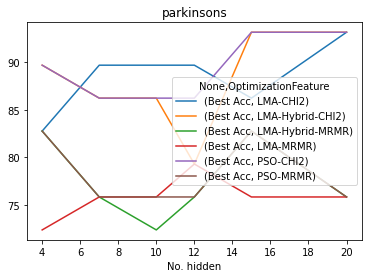

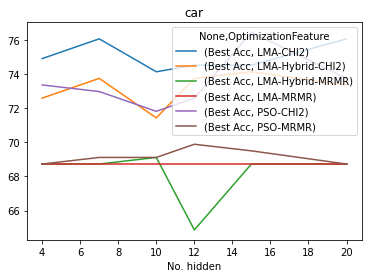

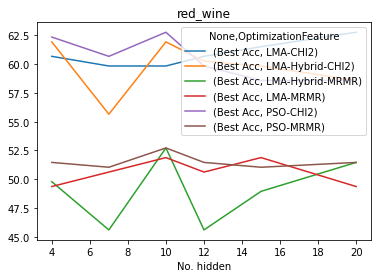

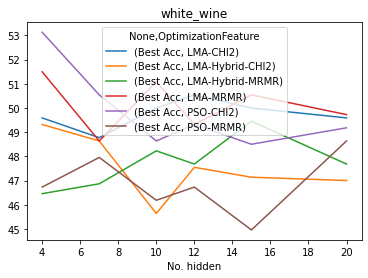

In [4]:
feature = 'Best Acc'
for database in db_names:
    results = pd_results[pd_results['Database']==database][['No. hidden', feature, 'OptimizationFeature']]
    table = pd.pivot_table(results, columns=['OptimizationFeature'], index=['No. hidden'],  aggfunc=np.max)
    table.plot(title=database)

# Best accuracy

In [20]:
for database in db_names:   
    display(Markdown('## '+database))
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        results_algorithm = results_algorithm.iloc[[results_algorithm['Best Acc'].idxmax()]]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm.sort_values(by=['Best Acc','No. hidden'], ascending=[False, True], inplace=True)
    display(general_results_algorithm)

## parkinsons

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
4,15,93.1034,68.9655,79.6552,8.3600,111.3861,204.8828,13.4000,6.6866,parkinsons,PSO,CHI2,PSO-CHI2
4,15,93.1034,93.1034,93.1034,0.0000,0.1996,0.0000,6.0000,0.0000,parkinsons,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
5,20,93.1034,72.4138,78.6207,6.0386,0.4554,0.1342,12.2000,8.8418,parkinsons,LMA,CHI2,LMA-CHI2
0,4,82.7586,72.4138,74.8276,3.2713,184.4560,207.7238,13.8000,5.0067,parkinsons,PSO,MRMR,PSO-MRMR
0,4,82.7586,82.7586,82.7586,0.0000,0.3254,0.0000,6.0000,0.0000,parkinsons,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
3,12,79.3103,48.2759,70.6897,8.1682,0.2291,0.0287,8.0000,2.9439,parkinsons,LMA,MRMR,LMA-MRMR


## car

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
4,15,76.4479,65.6371,70.2703,3.5199,13.3274,8.2464,11.8000,6.9730,car,PSO,CHI2,PSO-CHI2
1,7,76.0618,72.2008,73.2046,1.1540,0.4272,0.1394,17.0000,2.6247,car,LMA,CHI2,LMA-CHI2
4,15,74.1313,74.1313,74.1313,0.0000,0.3563,0.0000,11.0000,0.0000,car,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
3,12,69.8842,67.1815,68.7259,0.6562,137.7555,208.9168,10.8000,8.8544,car,PSO,MRMR,PSO-MRMR
2,10,69.1120,69.1120,69.1120,0.0000,0.1677,0.0000,6.0000,0.0000,car,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,68.7259,68.7259,68.7259,0.0000,0.2753,0.2256,11.5000,2.6352,car,LMA,MRMR,LMA-MRMR


## red_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
2,10,62.7615,29.2887,49.1213,11.4996,197.4043,247.3643,16.8000,4.1312,red_wine,PSO,CHI2,PSO-CHI2
5,20,62.7615,55.6485,59.1213,1.7537,1.8490,0.5724,13.8000,2.0440,red_wine,LMA,CHI2,LMA-CHI2
0,4,61.9247,61.9247,61.9247,0.0000,0.2668,0.0000,8.0000,0.0000,red_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
2,10,52.7197,33.4728,45.1046,5.9884,100.4162,189.1772,12.8000,7.6999,red_wine,PSO,MRMR,PSO-MRMR
2,10,52.7197,52.7197,52.7197,0.0000,0.2331,0.0000,8.0000,0.0000,red_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
2,10,51.8828,46.4435,48.7448,1.6054,0.8261,0.3475,11.7000,1.8886,red_wine,LMA,MRMR,LMA-MRMR


## white_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
0,4,53.1335,18.9373,43.7602,9.6556,235.9181,291.9717,13.2000,6.5456,white_wine,PSO,CHI2,PSO-CHI2
0,4,51.4986,44.9591,46.8801,2.1062,0.7482,0.1003,15.6000,2.9136,white_wine,LMA,MRMR,LMA-MRMR
3,12,50.5450,46.0490,47.5341,1.3138,1.8785,0.3751,15.0000,3.8006,white_wine,LMA,CHI2,LMA-CHI2
4,15,49.4550,49.4550,49.4550,0.0000,0.7391,0.0000,10.0000,0.0000,white_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,49.3188,49.3188,49.3188,0.0000,0.4849,0.0000,9.0000,0.0000,white_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
5,20,48.6376,20.8447,33.0381,8.7284,103.6816,208.8166,8.3000,7.3037,white_wine,PSO,MRMR,PSO-MRMR


In [53]:
## General results for mean accuracy

general_results_algorithm = pd.DataFrame([])
for database in db_names:   
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    
print(general_results_algorithm.groupby(by='OptimizationFeature').mean()[['Mean','STD']].round(3).to_markdown())

| OptimizationFeature   |   Mean |   STD |
|:----------------------|-------:|------:|
| LMA-CHI2              | 63.388 | 2.854 |
| LMA-Hybrid-CHI2       | 67.084 | 0     |
| LMA-Hybrid-MRMR       | 60.621 | 0     |
| LMA-MRMR              | 58.658 | 2.823 |
| PSO-CHI2              | 58.214 | 7.88  |
| PSO-MRMR              | 53.982 | 6.548 |


In [26]:
## General results for STD accuracy

general_results_accuracy = pd.DataFrame([])
for database in db_names:   
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm['Rank'] = general_results_algorithm['STD'].rank()
    general_results_accuracy = general_results_accuracy.append(general_results_algorithm.sort_values(by=['STD'])[['OptimizationFeature','Rank']])

    
general_results_accuracy = general_results_accuracy[(general_results_accuracy['OptimizationFeature'] != 'LMA-Hybrid-CHI2') & (general_results_accuracy['OptimizationFeature'] != 'LMA-Hybrid-MRMR')]

print(general_results_accuracy.groupby(by='OptimizationFeature').mean().sort_values(by='Rank').round(0).to_markdown())

| OptimizationFeature   |   Rank |
|:----------------------|-------:|
| LMA-MRMR              |     20 |
| LMA-CHI2              |     21 |
| PSO-MRMR              |     26 |
| PSO-CHI2              |     30 |


In [66]:
general_results_accuracy = pd.DataFrame([])

for database in db_names:   
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        results_algorithm = results_algorithm.iloc[[results_algorithm['Best Acc'].idxmax()]]
        general_results_accuracy = general_results_accuracy.append(results_algorithm)
        
general_results_accuracy["No. hidden"] = general_results_accuracy["No. hidden"].astype("category")

general_results_accuracy.groupby(by='OptimizationFeature')['No. hidden'].apply(pd.Series.mode).to_frame()

No. hidden
OptimizationFeature             
LMA-CHI2            0         20
LMA-Hybrid-CHI2     0          4
                    1         15
LMA-Hybrid-MRMR     0         10
LMA-MRMR            0          4
PSO-CHI2            0         15
PSO-MRMR            0          4
                    1         10
                    2         12
                    3         20

# Mean epochs

In [8]:
for database in db_names:   
    display(Markdown('## '+database))
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        results_algorithm = results_algorithm.iloc[[results_algorithm['Best Acc'].idxmax()]]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm.sort_values(by=['Mean Epochs','No. hidden'], ascending=[True, True], inplace=True)
    display(general_results_algorithm)

## parkinsons

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
0,4,82.758621,82.758621,82.758621,0.000000,0.325367,0.000000,6.0,0.000000,parkinsons,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
4,15,93.103448,93.103448,93.103448,0.000000,0.199600,0.000000,6.0,0.000000,parkinsons,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
3,12,79.310345,48.275862,70.689655,8.168201,0.229099,0.028714,8.0,2.943920,parkinsons,LMA,MRMR,LMA-MRMR
5,20,93.103448,72.413793,78.620690,6.038586,0.455432,0.134241,12.2,8.841820,parkinsons,LMA,CHI2,LMA-CHI2
4,15,93.103448,68.965517,79.655172,8.360044,111.386124,204.882794,13.4,6.686637,parkinsons,PSO,CHI2,PSO-CHI2
0,4,82.758621,72.413793,74.827586,3.271322,184.455978,207.723843,13.8,5.006662,parkinsons,PSO,MRMR,PSO-MRMR


## car

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
2,10,69.111969,69.111969,69.111969,0.000000,0.167710,0.000000,6.0,0.000000,car,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
3,12,69.884170,67.181467,68.725869,0.656244,137.755477,208.916819,10.8,8.854377,car,PSO,MRMR,PSO-MRMR
4,15,74.131274,74.131274,74.131274,0.000000,0.356322,0.000000,11.0,0.000000,car,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
0,4,68.725869,68.725869,68.725869,0.000000,0.275268,0.225553,11.5,2.635231,car,LMA,MRMR,LMA-MRMR
4,15,76.447876,65.637066,70.270270,3.519896,13.327370,8.246405,11.8,6.972964,car,PSO,CHI2,PSO-CHI2
1,7,76.061776,72.200772,73.204633,1.154003,0.427171,0.139388,17.0,2.624669,car,LMA,CHI2,LMA-CHI2


## red_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
0,4,61.924686,61.924686,61.924686,0.000000,0.266837,0.000000,8.0,0.000000,red_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
2,10,52.719665,52.719665,52.719665,0.000000,0.233077,0.000000,8.0,0.000000,red_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
2,10,51.882845,46.443515,48.744770,1.605420,0.826144,0.347522,11.7,1.888562,red_wine,LMA,MRMR,LMA-MRMR
2,10,52.719665,33.472803,45.104603,5.988447,100.416199,189.177157,12.8,7.699928,red_wine,PSO,MRMR,PSO-MRMR
5,20,62.761506,55.648536,59.121339,1.753666,1.848995,0.572443,13.8,2.043961,red_wine,LMA,CHI2,LMA-CHI2
2,10,62.761506,29.288703,49.121339,11.499639,197.404303,247.364349,16.8,4.131182,red_wine,PSO,CHI2,PSO-CHI2


## white_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
5,20,48.637602,20.844687,33.038147,8.728389,103.681573,208.816610,8.3,7.303728,white_wine,PSO,MRMR,PSO-MRMR
0,4,49.318801,49.318801,49.318801,0.000000,0.484902,0.000000,9.0,0.000000,white_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
4,15,49.455041,49.455041,49.455041,0.000000,0.739149,0.000000,10.0,0.000000,white_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,53.133515,18.937330,43.760218,9.655590,235.918138,291.971697,13.2,6.545567,white_wine,PSO,CHI2,PSO-CHI2
3,12,50.544959,46.049046,47.534060,1.313770,1.878486,0.375130,15.0,3.800585,white_wine,LMA,CHI2,LMA-CHI2
0,4,51.498638,44.959128,46.880109,2.106167,0.748156,0.100273,15.6,2.913570,white_wine,LMA,MRMR,LMA-MRMR


In [9]:
## General results for mean accuracy

general_results_accuracy = pd.DataFrame([])
for database in db_names:   
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm['Rank'] = general_results_algorithm['Mean Epochs'].rank()
    general_results_accuracy = general_results_accuracy.append(general_results_algorithm.sort_values(by=['STD'])[['OptimizationFeature','Rank']])
    
general_results_accuracy.groupby(by='OptimizationFeature').mean().sort_values(by='Rank')

,Rank
OptimizationFeature,
LMA-Hybrid-MRMR,7.083333
LMA-Hybrid-CHI2,13.770833
LMA-MRMR,17.958333
PSO-MRMR,20.458333
PSO-CHI2,23.583333
LMA-CHI2,28.145833


In [10]:
general_reults = pd.DataFrame()

for database in db_names:   
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        results_algorithm = results_algorithm.iloc[[results_algorithm['Best Acc'].idxmax()]]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm.sort_values(by=['Mean Epochs','No. hidden'], ascending=[True, True], inplace=True)
    general_reults = general_reults.append(general_results_algorithm)

general_reults.groupby('OptimizationFeature').mean()[['Mean Epochs','No. hidden']].sort_values(by='No. hidden')

,Mean Epochs,No. hidden
OptimizationFeature,,
LMA-MRMR,11.700,7.50
LMA-Hybrid-CHI2,8.500,9.50
LMA-Hybrid-MRMR,7.500,9.75
PSO-CHI2,13.800,11.00
PSO-MRMR,11.425,11.50
LMA-CHI2,14.500,14.75


In [11]:
## General results for mean accuracy

general_results_accuracy = pd.DataFrame([])
for database in db_names:   
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm['Rank'] = general_results_algorithm['STD Epochs'].rank()
    general_results_accuracy = general_results_accuracy.append(general_results_algorithm.sort_values(by=['STD'])[['OptimizationFeature','Rank']])
    
general_results_accuracy.groupby(by='OptimizationFeature').mean().sort_values(by='Rank')

,Rank
OptimizationFeature,
LMA-Hybrid-CHI2,6.500000
LMA-Hybrid-MRMR,6.500000
LMA-MRMR,17.083333
LMA-CHI2,21.375000
PSO-CHI2,29.416667
PSO-MRMR,30.125000


# Mean Execution Time

In [12]:
for database in db_names:   
    display(Markdown('## '+database))
    general_results_algorithm = pd.DataFrame([])
    for algorithm in results['OptimizationFeature'].unique():
        results_algorithm = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]
        results_algorithm = results_algorithm.iloc[[results_algorithm['Best Acc'].idxmax()]]
        general_results_algorithm = general_results_algorithm.append(results_algorithm)
    general_results_algorithm.sort_values(by=['Mean Time','No. hidden'], ascending=[True, True], inplace=True)
    display(general_results_algorithm)

## parkinsons

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
4,15,93.103448,93.103448,93.103448,0.000000,0.199600,0.000000,6.0,0.000000,parkinsons,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
3,12,79.310345,48.275862,70.689655,8.168201,0.229099,0.028714,8.0,2.943920,parkinsons,LMA,MRMR,LMA-MRMR
0,4,82.758621,82.758621,82.758621,0.000000,0.325367,0.000000,6.0,0.000000,parkinsons,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
5,20,93.103448,72.413793,78.620690,6.038586,0.455432,0.134241,12.2,8.841820,parkinsons,LMA,CHI2,LMA-CHI2
4,15,93.103448,68.965517,79.655172,8.360044,111.386124,204.882794,13.4,6.686637,parkinsons,PSO,CHI2,PSO-CHI2
0,4,82.758621,72.413793,74.827586,3.271322,184.455978,207.723843,13.8,5.006662,parkinsons,PSO,MRMR,PSO-MRMR


## car

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
2,10,69.111969,69.111969,69.111969,0.000000,0.167710,0.000000,6.0,0.000000,car,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,68.725869,68.725869,68.725869,0.000000,0.275268,0.225553,11.5,2.635231,car,LMA,MRMR,LMA-MRMR
4,15,74.131274,74.131274,74.131274,0.000000,0.356322,0.000000,11.0,0.000000,car,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
1,7,76.061776,72.200772,73.204633,1.154003,0.427171,0.139388,17.0,2.624669,car,LMA,CHI2,LMA-CHI2
4,15,76.447876,65.637066,70.270270,3.519896,13.327370,8.246405,11.8,6.972964,car,PSO,CHI2,PSO-CHI2
3,12,69.884170,67.181467,68.725869,0.656244,137.755477,208.916819,10.8,8.854377,car,PSO,MRMR,PSO-MRMR


## red_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
2,10,52.719665,52.719665,52.719665,0.000000,0.233077,0.000000,8.0,0.000000,red_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,61.924686,61.924686,61.924686,0.000000,0.266837,0.000000,8.0,0.000000,red_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
2,10,51.882845,46.443515,48.744770,1.605420,0.826144,0.347522,11.7,1.888562,red_wine,LMA,MRMR,LMA-MRMR
5,20,62.761506,55.648536,59.121339,1.753666,1.848995,0.572443,13.8,2.043961,red_wine,LMA,CHI2,LMA-CHI2
2,10,52.719665,33.472803,45.104603,5.988447,100.416199,189.177157,12.8,7.699928,red_wine,PSO,MRMR,PSO-MRMR
2,10,62.761506,29.288703,49.121339,11.499639,197.404303,247.364349,16.8,4.131182,red_wine,PSO,CHI2,PSO-CHI2


## white_wine

,No. hidden,Best Acc,Worst Acc,Mean,STD,Mean Time,STD Time,Mean Epochs,STD Epochs,Database,OptimizationAlgorithm,FeatureSelectionMethod,OptimizationFeature
0,4,49.318801,49.318801,49.318801,0.000000,0.484902,0.000000,9.0,0.000000,white_wine,LMA-Hybrid,CHI2,LMA-Hybrid-CHI2
4,15,49.455041,49.455041,49.455041,0.000000,0.739149,0.000000,10.0,0.000000,white_wine,LMA-Hybrid,MRMR,LMA-Hybrid-MRMR
0,4,51.498638,44.959128,46.880109,2.106167,0.748156,0.100273,15.6,2.913570,white_wine,LMA,MRMR,LMA-MRMR
3,12,50.544959,46.049046,47.534060,1.313770,1.878486,0.375130,15.0,3.800585,white_wine,LMA,CHI2,LMA-CHI2
5,20,48.637602,20.844687,33.038147,8.728389,103.681573,208.816610,8.3,7.303728,white_wine,PSO,MRMR,PSO-MRMR
0,4,53.133515,18.937330,43.760218,9.655590,235.918138,291.971697,13.2,6.545567,white_wine,PSO,CHI2,PSO-CHI2


# Accuracy Analysis

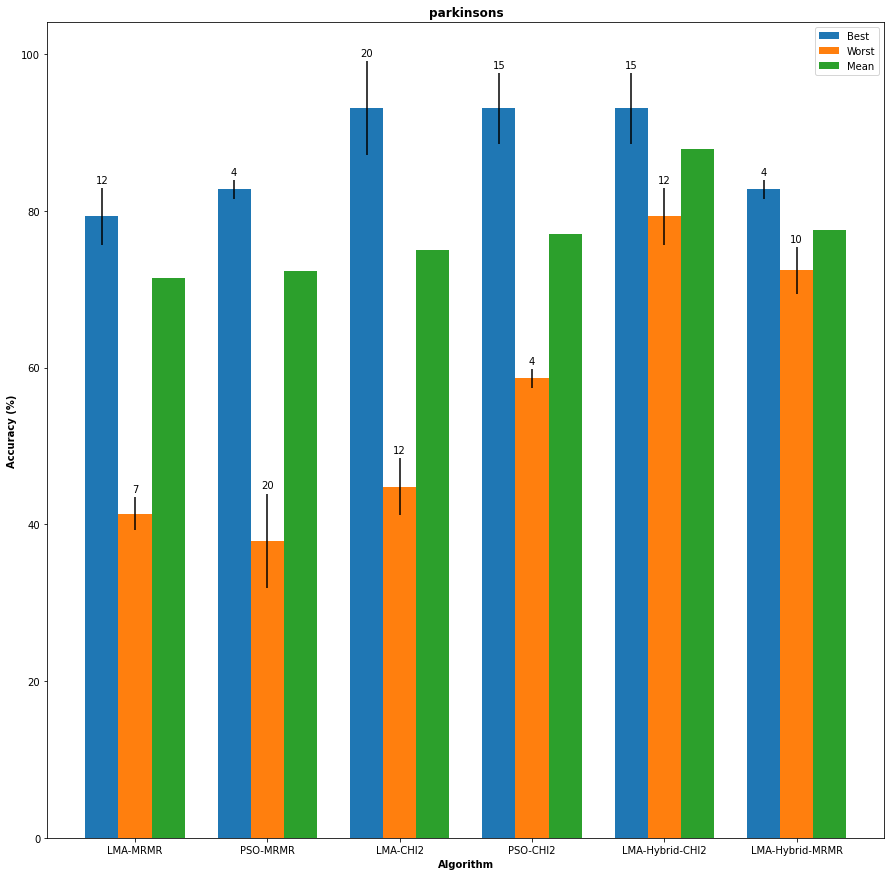

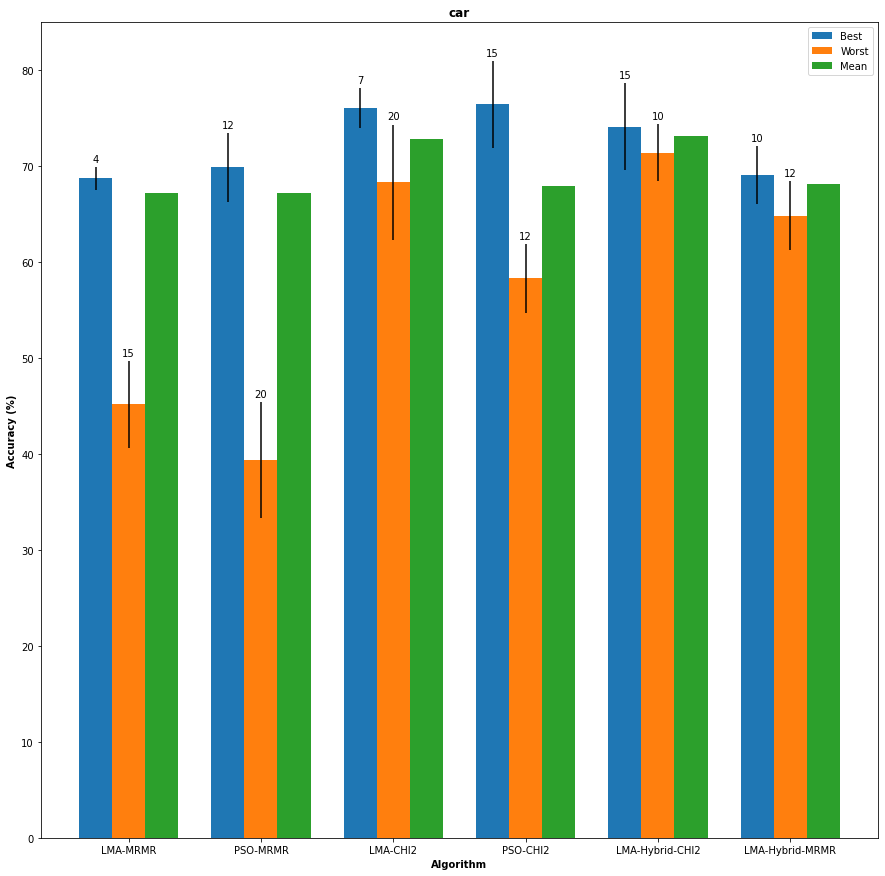

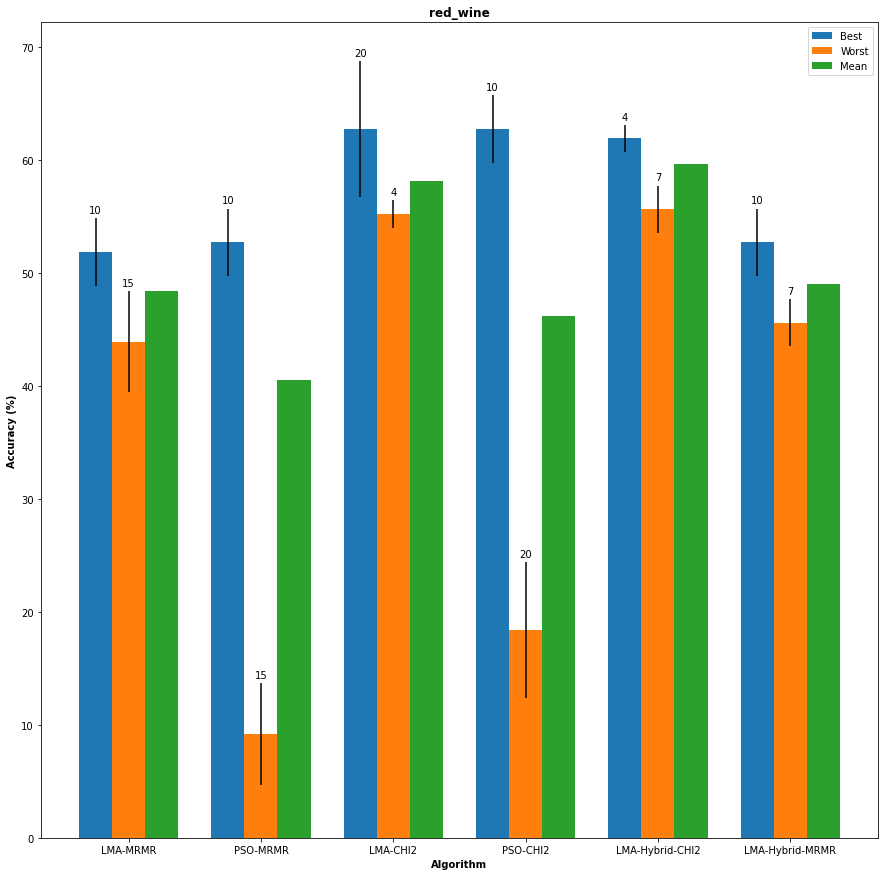

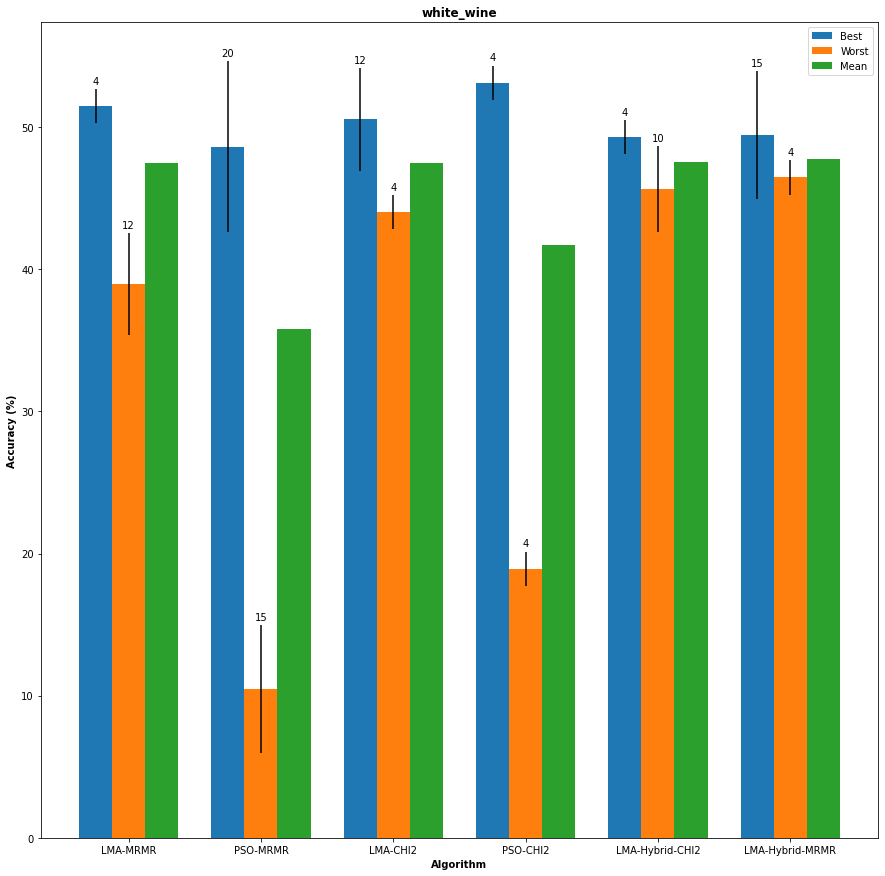

In [13]:
for database in db_names:

    results_algorithm = pd.DataFrame([], columns=['Algorithm', 'Best', 'Worst', 'Mean'])

    for algorithm in pd_results['OptimizationFeature'].unique():

        results_algorithm_aux = pd_results[ (pd_results['Database'] == database) & (pd_results['OptimizationFeature'] == algorithm)]

        row_max_acc = results_algorithm_aux['Best Acc'].argmax()
        row_min_acc = results_algorithm_aux['Worst Acc'].argmin()

        best = results_algorithm_aux['Best Acc'][row_max_acc]
        worst = results_algorithm_aux['Worst Acc'][row_min_acc]
        mean  = np.mean(results_algorithm_aux['Mean'])

        best_no_neurons = results_algorithm_aux['No. hidden'][row_max_acc]
        worst_no_neurons = results_algorithm_aux['No. hidden'][row_min_acc]

        new_line = {'Algorithm':algorithm, 'Best':best, 'Worst':worst, 'Mean':mean, 'No. hidden BEST':best_no_neurons, 'No. hidden WORST':worst_no_neurons}
        results_algorithm = results_algorithm.append(new_line, ignore_index=True)

    results_algorithm.set_index('Algorithm', inplace=True)
    
    results_algorithm['No. hidden MEAN'] = ''

    labels = results_algorithm.index.values

    best_arr = results_algorithm['Best'].values
    worst_arr = results_algorithm['Worst'].values
    mean_arr = results_algorithm['Mean'].values
    
    best_labels = results_algorithm['No. hidden BEST'].values
    worst_labels = results_algorithm['No. hidden WORST'].values
    mean_labels = results_algorithm['No. hidden MEAN'].values

    x = np.arange(len(labels))
    width = 0.25 

    pos1 = np.arange(len(best_arr))
    pos2 = [x + width for x in pos1]
    pos3 = [x + width for x in pos2]

    fig, ax = plt.subplots(figsize=(15, 15))

    rects1 = ax.bar(pos1, best_arr, width, label='Best', yerr=best_labels*0.3)
    rects2 = ax.bar(pos2, worst_arr, width, label='Worst', yerr=worst_labels*0.3)
    rects3 = ax.bar(pos3, mean_arr, width, label='Mean')

    ax.set_title(database, fontweight='bold')
    
    plt.ylabel('Accuracy (%)', fontweight='bold')
    plt.xlabel('Algorithm', fontweight='bold')
    plt.xticks([r + width for r in range(len(pos1))], labels)

    ax.legend()


    def autolabel(rects, ax, labels):
        for i in range(len(rects)):
            rect = rects[i]
            height = rect.get_height()
            ax.annotate('{}'.format(int(labels[i])),
                        xy=(rect.get_x() + rect.get_width() / 2, height+0.3*labels[i]),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1, ax, best_labels)
    autolabel(rects2, ax, worst_labels)
    #autolabel(rects3, ax, mean_labels)


    plt.show()


# Epochs Analysis

In [14]:
results_epoch = {'Database':[], 'Algorithm':[], 'Epochs':[], 'No. hidden':[], 'Accuracy':[]}

for algorithm in results['OptimizationFeature'].unique():
    for database in db_names:
        result_algorithm_database = pd_results[ (pd_results['OptimizationFeature']==algorithm) & (pd_results['Database']==database) ]
        
        best_results = result_algorithm_database.sort_values(by=['Mean Epochs', 'No. hidden', 'Best Acc'], ascending=[True, True, False]).head(1)
        
        epochs = best_results['Mean Epochs'].values[0]
        no_hidden = best_results['No. hidden'].values[0]
        accuracy = best_results['Best Acc'].values[0]
        
        results_epoch['Database'].append(database)
        results_epoch['Algorithm'].append(algorithm)
        results_epoch['Epochs'].append(epochs)
        results_epoch['No. hidden'].append(no_hidden)
        results_epoch['Accuracy'].append(accuracy)
        
results_epoch = pd.DataFrame(results_epoch)
results_epoch = pd.pivot_table(results_epoch, index=['Algorithm'], columns=['Database'])

results_epoch = results_epoch.swaplevel(axis=1)

order = [('car', 'Epochs'),
('car', 'No. hidden'),
('car', 'Accuracy'),
('parkinsons', 'Epochs'),
('parkinsons', 'No. hidden'),
('parkinsons', 'Accuracy'),
('red_wine', 'Epochs'),
('red_wine', 'No. hidden'),
('red_wine', 'Accuracy'),
('white_wine', 'Epochs'),
('white_wine', 'No. hidden'),
('white_wine', 'Accuracy')]
results_epoch = results_epoch.reindex(order, axis=1)

results_epoch.style.apply(highlight_min, subset=[('car', 'Epochs'),('parkinsons', 'Epochs'),('red_wine', 'Epochs'),('white_wine', 'Epochs'),])

# Execution time analysis

In [15]:
pd_results['SecsIte'] = pd_results['Mean Time']/pd_results['Mean Epochs']
results_excution_time = pd.pivot_table(pd_results, columns=['OptimizationFeature'], index=['No. hidden'], values=['SecsIte'])

<AxesSubplot:xlabel='No. hidden'>

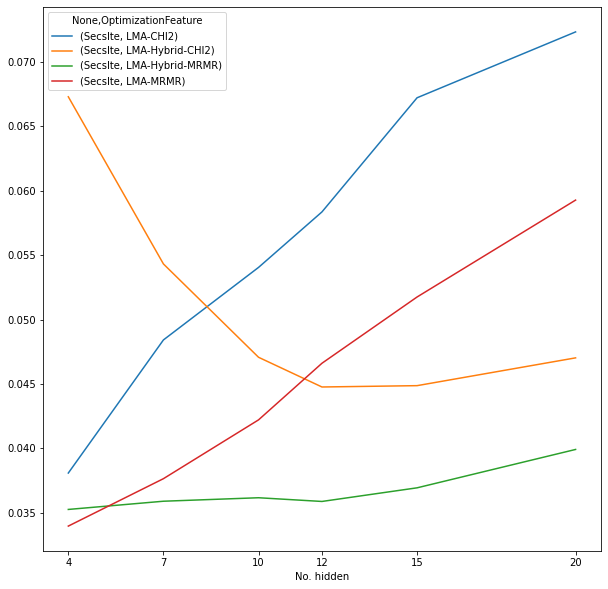

In [16]:
results_excution_time[results_excution_time.columns.values[:-2]].ewm(alpha=.05).mean().plot(figsize=(10,10), xticks=results_excution_time.index.values)

*Note*: Check if we need to split for each dataset

<AxesSubplot:xlabel='No. hidden'>

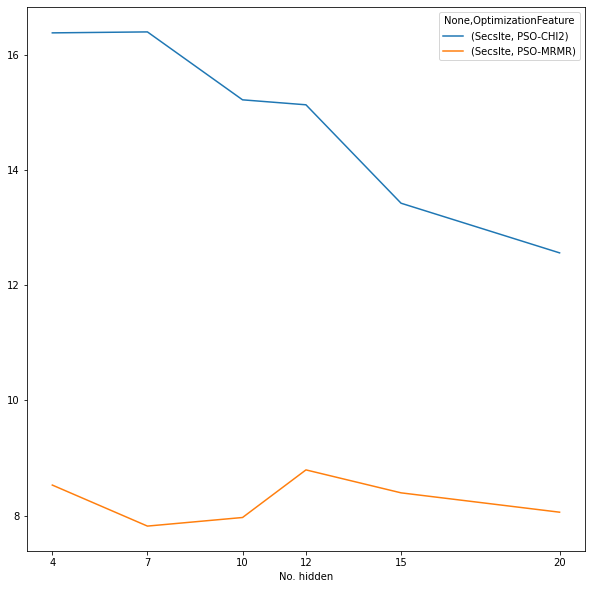

In [17]:
results_excution_time[results_excution_time.columns.values[4:]].ewm(alpha=.05).mean().plot(figsize=(10,10), xticks=results_excution_time.index.values)